In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

In [2]:
# model = keras.models.Sequential()
# model.add(keras.layers.Flatten(input_shape = (28,28)))              # input layer
# model.add(keras.layers.Dense(300, activation = 'relu'))             # hidden layer
# model.add(keras.layers.Dense(100, activation = 'relu'))             # hidden layer
# model.add(keras.layers.Dense(10, activation = 'softmax'))           # output layer

In [31]:
keras.backend.clear_session()
tf.random.set_seed(42)

In [32]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape = (28,28)),
    keras.layers.Dense(300, activation = 'relu'),
    keras.layers.Dense(100, activation = 'relu'),
    keras.layers.Dense(10,  activation = 'softmax')
])

In [33]:
keras.utils.plot_model(model, "Fashin Mnist.png")

('Failed to import pydot. You must `pip install pydot` and install graphviz (https://graphviz.gitlab.io/download/), ', 'for `pydotprint` to work.')


In [34]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [35]:
fashion_mnist = keras.datasets.fashion_mnist

In [36]:
(x_train_full, y_train_full),(x_test,y_test)= fashion_mnist.load_data()

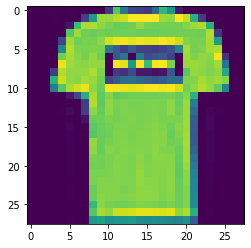

In [37]:
plt.imshow(x_train_full[1]);

In [38]:
x_train_full[0].shape

(28, 28)

In [39]:
x_valid, x_train = x_train_full[:5000]/255, x_train_full[5000:]/255
y_valid, y_train = y_train_full[:5000]    , y_train_full[5000:]

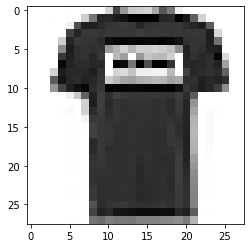

In [40]:
plt.imshow(x_valid[1], cmap ='binary');

In [41]:
class_names = ["T-shirt/top", "Trouser", "Pullover","Dress", "Coat","Sandal", "Shirt", "Sneaker", "Bag", "Ankleboot"]

In [42]:
model.compile(loss='sparse_categorical_crossentropy', optimizer = 'sgd',metrics = ['accuracy'])

In [43]:
history = model.fit(x_train,y_train, validation_data=(x_valid,y_valid), epochs = 30)

Epoch 1/30
1719/1719 [==============================] - 3s 1ms/step - loss: 1.0187 - accuracy: 0.6805 - val_loss: 0.5213 - val_accuracy: 0.8226
Epoch 2/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.5027 - accuracy: 0.8262 - val_loss: 0.4349 - val_accuracy: 0.8528
Epoch 3/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4484 - accuracy: 0.8425 - val_loss: 0.5304 - val_accuracy: 0.7992
Epoch 4/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4209 - accuracy: 0.8527 - val_loss: 0.3917 - val_accuracy: 0.8646
Epoch 5/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4060 - accuracy: 0.8583 - val_loss: 0.3743 - val_accuracy: 0.8692
Epoch 6/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3754 - accuracy: 0.8671 - val_loss: 0.3703 - val_accuracy: 0.8728
Epoch 7/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3652 - accuracy: 0.8706 - val_loss: 0.3623 - val_accuracy:

In [52]:
model.evaluate(x_test,y_test, return_dict = True)

313/313 [==============================] - 0s 1ms/step - loss: 79.5234 - accuracy: 0.8293


{'loss': 79.52336883544922, 'accuracy': 0.8292999863624573}

In [53]:
model.metrics_names

['loss', 'accuracy']

In [47]:
prediction = model.predict_classes(x_test[0:30])

C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


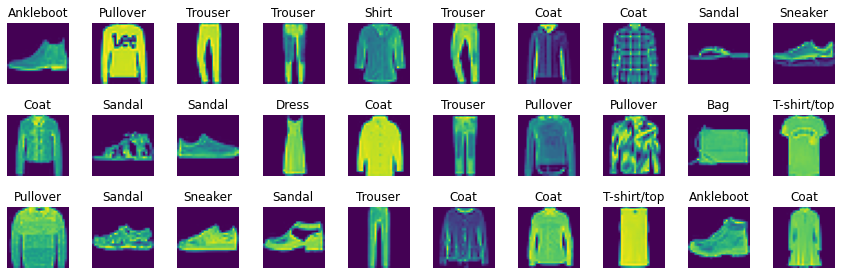

In [48]:
rows = 3
cols = 10
plt.figure(figsize = (cols*1.5,rows*1.5,))
for row in range(rows):
    for column in range(cols):
        i = row * cols + column
        plt.subplot(rows,cols,i+1)
        plt.imshow(x_test[i])
        plt.title(class_names[prediction[i]])
        plt.axis('off')
plt.subplots_adjust(wspace = 0.2, hspace = 0.5)
plt.show()

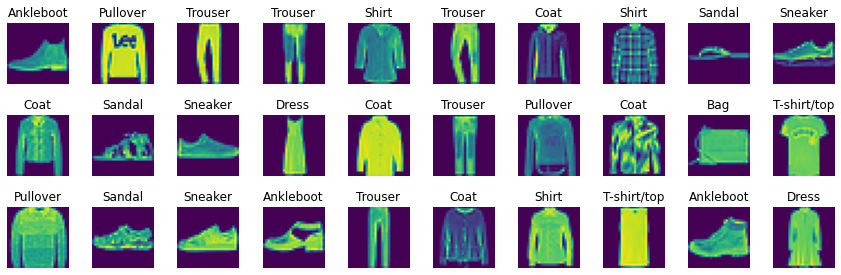

In [49]:
rows = 3
cols = 10
plt.figure(figsize = (cols*1.5,rows*1.5,))
for row in range(rows):
    for column in range(cols):
        i = row * cols + column
        plt.subplot(rows,cols,i+1)
        plt.imshow(x_test[i])
        plt.title(class_names[y_test[i]])
        plt.axis('off')
plt.subplots_adjust(wspace = 0.2, hspace = 0.5)
plt.show()

In [50]:
import pandas as pd
model_graphs = pd.DataFrame(history.history)

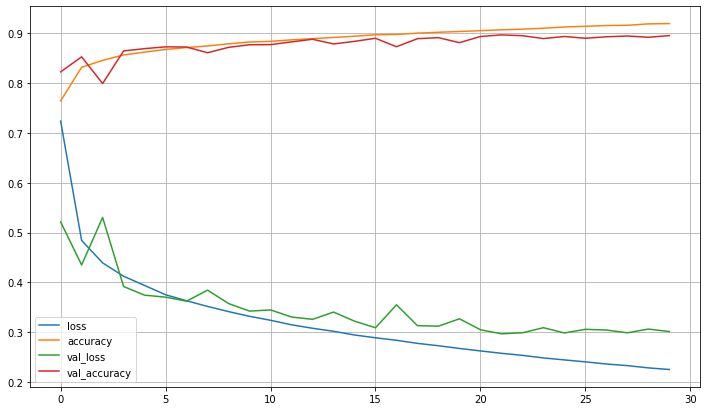

In [51]:
model_graphs.plot(figsize = (12,7))
plt.grid(True)

In [22]:
from sklearn.linear_model import SGDClassifier

In [23]:
clf = SGDClassifier()

In [24]:
clf?

Type:        SGDClassifier
String form: SGDClassifier()
File:        c:\programdata\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py
Docstring:  
Linear classifiers (SVM, logistic regression, etc.) with SGD training.

This estimator implements regularized linear models with stochastic
gradient descent (SGD) learning: the gradient of the loss is estimated
each sample at a time and the model is updated along the way with a
decreasing strength schedule (aka learning rate). SGD allows minibatch
(online/out-of-core) learning via the `partial_fit` method.
For best results using the default learning rate schedule, the data should
have zero mean and unit variance.

This implementation works with data represented as dense or sparse arrays
of floating point values for the features. The model it fits can be
controlled with the loss parameter; by default, it fits a linear support
vector machine (SVM).

The regularizer is a penalty added to the loss function that shrinks mod

In [27]:
model?

Signature:      model(*args, **kwargs)
Type:           Sequential
String form:    <tensorflow.python.keras.engine.sequential.Sequential object at 0x000001B3A6CBA5E0>
File:           c:\programdata\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py
Docstring:     
`Sequential` groups a linear stack of layers into a `tf.keras.Model`.

`Sequential` provides training and inference features on this model.

Examples:

>>> # Optionally, the first layer can receive an `input_shape` argument:
>>> model = tf.keras.Sequential()
>>> model.add(tf.keras.layers.Dense(8, input_shape=(16,)))
>>> # Afterwards, we do automatic shape inference:
>>> model.add(tf.keras.layers.Dense(4))

>>> # This is identical to the following:
>>> model = tf.keras.Sequential()
>>> model.add(tf.keras.Input(shape=(16,)))
>>> model.add(tf.keras.layers.Dense(8))

>>> # Note that you can also omit the `input_shape` argument.
>>> # In that case the model doesn't have any weights until the first call
>>> # t